<a id="3"></a>
### 3. Loading Libraries and Reading Data

<a id="31"></a>
#### a. Loading libraries

Let's start by importing the libraries we need 

In [282]:
import pandas as pd
from pandas import set_option
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

# from sklearn import model_selection, preprocessing, metrics
# from sklearn.metrics import mean_squared_error
# from pandas.plotting import scatter_matrix
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from pandas import get_dummies
# import lightgbm as lgb
# import xgboost as xgb
# import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

<a id="32"></a>
#### b. Version of Installed Python Library 

For the purpose of reproducibility of this analysis, displaying the versions of installed libraries

In [120]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

matplotlib: 3.5.2
sklearn: 1.0.2
seaborn: 0.11.2
pandas: 1.3.5
numpy: 1.21.6


<a id="33"></a>
#### c. Loading Data

In [121]:
DATA_PATH = 'data'
FILE_NAME = 'recs2009_public.csv'
df = pd.read_csv(os.path.join(DATA_PATH, FILE_NAME), encoding = 'utf-8-sig')

<a id="4"></a>
### 4. Exploratory Data Analysis (EDA)

In the EDA phase, we will perform initial investigations on the dataset to check the following information:
- data dimensionality (or shape) alongwith observing first few observations of the dataset
- data types (whether categorical or numerical)
- generate summary statistics
- check for missing values
- explore our target variable _'KWH'_ and explore possible predictors from the dataset
- detect outliers and anomalies
- explore predictor variables

<a id="41"></a>
#### a. Data Dimensionality

Let's start by glancing first few observations of the RECS dataset alongwith its dimensionality

In [122]:
pd.options.display.max_columns = df.shape[1]
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHEAT,BASEHT2,PCTBSTHT,BASECOOL,BASECL2,PCTBSTCL,BASEUSE,ATTIC,ATTICFIN,FINATTRMS,ATTCHEAT,ATTCHT2,PCTATTHT,ATTCCOOL,ATTCCL2,PCTATTCL,ATTICUSE,PRKGPLC1,SIZEOFGARAGE,GARGLOC,GARGHEAT,GARGCOOL,PRKGPLC2,SIZEOFDETACH,OUTLET,ZKOWNRENT,ZCONDCOOP,ZYEARMADE,ZYEARMADERANGE,ZOCCUPYYRANGE,ZCONVERSION,ZORIG1FAM,ZLOOKLIKE,ZNUMFLRS,ZNUMAPTS,ZWALLTYPE,ZROOFTYPE,ZSTUDIO,ZNAPTFLRS,ZSTORIES,ZTYPEHUQ4,ZBEDROOMS,ZNCOMBATH,ZNHAFBATH,ZOTHROOMS,ZCELLAR,ZCRAWL,ZCONCRETE,ZBASEFIN,ZFINBASERMS,ZBASEHEAT,ZBASEHT2,ZPCTBSTHT,ZBASECOOL,ZBASECL2,ZPCTBSTCL,ZBASEUSE,ZATTIC,ZATTICFIN,ZFINATTRMS,ZATTCHEAT,ZATTCHT2,ZPCTATTHT,ZATTCCOOL,ZPCTATTCL,ZATTCCL2,ZATTICUSE,ZPRKGPLC1,ZSIZEOFGARAGE,ZGARGLOC,ZGARGHEAT,ZGARGCOOL,ZPRKGPLC2,ZSIZEOFDETACH,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,REFRIGT2,MONRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,REFRIGT3,MONRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,NUMFREEZ,UPRTFRZR,SIZFREEZ,FREEZER,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,SIZFREEZ2,FREEZER2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,ZSTOVEN,ZSTOVENFUEL,ZSTOVE,ZSTOVEFUEL,ZOVEN,ZOVENFUEL,ZOVENUSE,ZOVENCLN,ZTYPECLN,ZMICRO,ZAMTMICRO,ZDEFROST,ZOUTGRILL,ZOUTGRILLFUEL,ZTOPGRILL,ZSTGRILA,ZTOASTER,ZNUMMEAL,ZFUELFOOD,ZCOFFEE,ZNUMFRIG,ZTYPERFR1,ZSIZRFRI1,ZREFRIGT1,ZICE,ZAGERFRI1,ZTYPERFR2,ZSIZRFRI2,ZREFRIGT2,ZMONRFRI2,ZAGERFRI2,ZTYPERFR3,ZSIZRFRI3,ZREFRIGT3,ZMONRFRI3,ZAGERFRI3,ZSEPFREEZ,ZNUMFREEZ,ZUPRTFRZR,ZSIZFREEZ,ZFREEZER,ZAGEFRZR,ZUPRTFRZR2,ZSIZFREEZ2,ZFREEZER2,ZAGEFRZR2,ZDISHWASH,ZDWASHUSE,ZAGEDW,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,DRYRUSE,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVONWEWATCH1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,OTHERSTB2,TVONWD2,TVONWDWATCH2,TVONWE2,TVONWEWATCH2,TVSIZE3,TVTYPE3,CABLESAT3,COMBODVR3,DVR3,DIGITSTB3,PLAYSTA3,COMBOVCRDVD3,VCR3,DVD3,TVAUDIOSYS3,OTHERSTB3,TVONWD3,TVONWDWATCH3,TVONWE3,TVONWEWATCH3,COMPUTER,NUMPC,PCTYPE1,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCONOFF2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCONOFF3,PCSLEEP3,INTERNET,INDIALUP,INDSL,INCABLE,INSATEL,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,ZCWASHER,ZTOPFRONT,ZWASHLOAD,ZWASHTEMP,ZRNSETEMP,ZAGECWASH,ZDRYER,ZDRYRFUEL,ZDRYRUSE,ZAGECDRYER,ZTVCOLOR,ZTVSIZE1,ZTVTYPE1,ZCABLESAT1,ZCOMBODVR1,ZDVR1,ZDIGITSTB1,ZPLAYSTA1,ZCOMBOVCRDVD1,ZVCR1,ZDVD1,ZTVAUDIOSYS1,ZOTHERSTB1,ZTVONWD1,ZTVONWDWATCH1,ZTVONWE1,ZTVONWEWATCH1,ZTVSIZE2,ZTVTYPE2,ZCABLESAT2,ZCOMBODVR2,ZDVR2,ZDIGITSTB2,ZPLAYSTA2,ZCOMBOVCRDVD2,ZVCR2,ZDVD2,ZTVAUDIOSYS2,ZOTHERSTB2,ZTVONWD2,ZTVONWDWATCH2,ZTVONWE2,ZTVONWEWATCH2,ZTVSIZE3,ZTVTYPE3,ZCABLESAT3,ZCOMBODVR3,ZDVR3,ZDIGITSTB3,ZPLAYSTA3,ZCOMBOVCRDVD3,ZVCR3,ZDVD3,ZTVAUDIOSYS3,ZOTHERSTB3,ZTVONWD3,ZTVONWDWATCH3,ZTVONWE3,ZTVONWEWATCH3,ZCOMPUTER,ZNUMPC,ZPCTYPE1,ZMONITOR1,ZTIMEON1,ZPCONOFF1,ZPCSLEEP1,ZPCTYPE2,ZMONITOR2,ZTIMEON2,ZPCONOFF2,ZPCSLEEP2,ZPCTYPE3,ZMONITOR3,ZTIMEON3,ZPCONOFF3,ZPCSLEEP3,ZINTERNET,ZINDIALUP,ZINDSL,ZINCABLE,ZINSATEL,ZINWIRELESS,ZPCPRINT,ZFAX,ZCOPIER,ZWELLPUMP,ZDIPSTICK,ZSWAMPCOL,ZAQUARIUM,ZSTEREO,ZNOCORD,ZANSMACH,ZBATTOOLS,ZBATCHRG,ZCHRGPLGT,ZELECDEV,ZELECCHRG,ZCHRGPLGE,HEATHOME,DNTHEAT,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HE

In [123]:
print(f"Shape of the dataset df_recs is {df.shape}")

Shape of the dataset df_recs is (12083, 940)


As can be seen above, RECS 2009 dataset consists of 12,083 observations and 940 features. Let's explore how many of these features are categorical vs numerical

<a id="42"></a>
#### b. Data Types

In [124]:
num_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(num_features))

cat_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(cat_features))

Number of Numerical features:  935
Number of Categorical features:  5


`df.info()` method prints a concise summary of a dataframe including count of index data type, number of columns. `df.describe()` method prints out the descriptive statistics including mean, median (i.e. Second Quartile, Q2 depicted by 50% in the summary table below), standard deviation, range, Q1 and Q3 quartile values. As can be seen below, RECS 2009 dataset consists of three different column data types:
- _float64_ data type with 50 columns
- _int64_ data type with 885 columns, and 
- _object_ data type with 5 columns

The count of column data types is consistent with the count of numerical and categorical features we calculated above. Count of Numerical features we calculated above is actually sum of number of _float64_ and _int64_ data type columns i.e. (50 + 885 = 935). 

The number of records, 12083 is consistent with what we found using `df.shape`. We don't have any NA values in the dataset.

In [129]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


<a id="43"></a>
#### c. Summary Statistics

In [131]:
df.describe()

DOEID       REGIONC      DIVISION  REPORTABLE_DOMAIN  \
count  12083.000000  12083.000000  12083.000000       12083.000000   
mean    6042.000000      2.628321      5.373086          14.783663   
std     3488.205986      1.042142      2.859366           8.195824   
min        1.000000      1.000000      1.000000           1.000000   
25%     3021.500000      2.000000      3.000000           8.000000   
50%     6042.000000      3.000000      5.000000          15.000000   
75%     9062.500000      3.000000      7.000000          21.000000   
max    12083.000000      4.000000     10.000000          27.000000   

            TYPEHUQ       NWEIGHT         HDD65         CDD65       HDD30YR  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       2.659604   9402.981870   4141.375238   1415.406108   4135.146983   
std        1.192627   5192.101419   2317.759375   1134.659475   2260.543686   
min        1.000000    476.100000      0.000000      0.000000      0.000000   
25%        2.000000   6297.040000   2197.500000    561.000000   2224.000000   
50%        2.000000   7970.630000   4483.000000   1045.000000   4502.000000   
75%        3.000000  11330.030000   5913.000000   1897.000000   5854.000000   
max        5.000000  95779.140000  12525.000000   5480.000000  13346.000000   

            CDD30YR  Climate_Region_Pub      AIA_Zone      KOWNRENT  \
count  12083.000000        12083.000000  12083.000000  12083.000000   
mean    1443.503104            2.601010      3.265000      1.338078   
std     1021.748722            1.349571      1.278652      0.497299   
min        0.000000            1.000000      1.000000      1.000000   
25%      712.000000            1.000000      2.000000      1.000000   
50%     1179.000000            3.000000      3.000000      1.000000   
75%     1842.500000            4.000000      4.000000      2.000000   
max     5357.000000            5.000000      5.000000      3.000000   

           CONDCOOP      YEARMADE  YEARMADERANGE  OCCUPYYRANGE    CONVERSION  \
count  12083.000000  12083.000000   12083.000000  12083.000000  12083.000000   
mean      -1.801457   1971.062402       4.027725      6.691964     -1.752793   
std        0.784550     24.817912       2.119578      1.535312      0.865886   
min       -2.000000   1920.000000       1.000000      1.000000     -2.000000   
25%       -2.000000   1955.000000       2.000000      6.000000     -2.000000   
50%       -2.000000   1975.000000       4.000000      7.000000     -2.000000   
75%       -2.000000   1991.000000       6.000000      8.000000     -2.000000   
max        2.000000   2009.000000       8.000000      8.000000      2.000000   

           ORIG1FAM      LOOKLIKE       NUMFLRS       NUMAPTS      WALLTYPE  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean      -1.952164     -1.955640     -1.066705      4.486717      2.738889   
std        0.364856      0.386862      2.766326     29.662574      1.512821   
min       -2.000000     -2.000000     -2.000000     -2.000000      1.000000   
25%       -2.000000     -2.000000     -2.000000     -2.000000      2.000000   
50%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
75%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
max        1.000000      2.000000     35.000000    365.000000      9.000000   

           ROOFTYPE        STUDIO      NAPTFLRS       STORIES      TYPEHUQ4  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       3.676157     -1.510635     -1.269635     10.507738     -1.899694   
std        2.772088      0.890336      1.323690      8.779010      0.472066   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        2.000000     -2.000000     -2.000000     10.000000     -2.000000   
50%        5.000000     -2.000000     -2.000000     10.000000     -2.000000   
75%        5.000000     -2.000000     -2.0000

**Key Observations:**
- Mean value is different (i.e. more or less) than median value for columns HDD65, CDD65, HDD30YR, CDD30YR, TOTSQFT, KWH, CDD80, OA_LAT
- Large difference in 75th percentile and maximum value for columns HDD65, CDD65, HDD30YR, CDD30YR, TOTSQFT, KWH, CDD80, OA_LAT
- Thus, these observations mean that there are outier values in our dataset

Now, let's check the summary statistics for categorical features

In [133]:
df.describe(include=['object'])

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
count,12083,12083,12083,12083,12083
unique,3,2,29,21,11
top,METRO,U,-2,-2,4A
freq,10302,9656,9958,9958,2703


In the table above, we can see the number of unique values as well as the top value and it's frequency for all the categorical features. Upon closely looking at features 'NOCRCASH' and 'NKRGALNC', we can observe that the topmost value is -2 with a frequency of 9,958 in each of these features. This doesn't seem right as -2 is of _int64_ data type and we previously found these features to be categorical in nature. Hence we will now check the counts of unique values for each of these features to see if there was any data entry error

In [127]:
df['NOCRCASH'].value_counts()

-2    9958
-2    2028
1       18
3       10
4       10
5        9
2        7
1        6
16       4
12       3
8        3
6        3
4        2
.        2
3        2
24       2
12       2
15       2
55       2
10       1
20       1
40       1
55       1
28       1
6        1
24       1
10       1
20       1
25       1
Name: NOCRCASH, dtype: int64

In [128]:
df['NKRGALNC'].value_counts()

-2    9958
-2    2028
5       42
3       11
1       10
10       8
5        5
10       5
1        2
.        2
15       2
8        1
3        1
2        1
77       1
30       1
15       1
8        1
55       1
2        1
20       1
Name: NKRGALNC, dtype: int64

We can observe from the above value counts for features 'NOCRCASH' and 'NKRGALNC' that there is '.' (period symbol) in two observations for each of these features. We will handle these cases in the data pre-processing section

Let's check the unique value counts for the remaining categorical features

In [134]:
cat_features_remaining = ['METROMICRO', 'UR', 'IECC_Climate_Pub'] 

In [136]:
for col in cat_features_remaining:
    print(df[col].value_counts(), '\n')

METRO    10302
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64 

U    9656
R    2427
Name: UR, dtype: int64 

4A               2703
5A               2402
1A-2A            1740
3B-4B            1523
3A               1235
6A-6B             971
5B-5C             476
3C                368
4C                312
2B                209
7A-7B-7AK-8AK     144
Name: IECC_Climate_Pub, dtype: int64 



We can also check the percentage distribution of the unique value counts

In [137]:
for col in cat_features_remaining:
    print(round(df[col].value_counts(normalize= True)*100), '\n')

METRO    85.0
MICRO     9.0
NONE      6.0
Name: METROMICRO, dtype: float64 

U    80.0
R    20.0
Name: UR, dtype: float64 

4A               22.0
5A               20.0
1A-2A            14.0
3B-4B            13.0
3A               10.0
6A-6B             8.0
5B-5C             4.0
3C                3.0
4C                3.0
2B                2.0
7A-7B-7AK-8AK     1.0
Name: IECC_Climate_Pub, dtype: float64 



85% of the responses (n = 10302) were recorded from housing units in census metropolitan area where as 9% of the responses (n = 1109) were recorded from housing units in census micropolitan area. On the contrary, 80% of the surveyed housing units (n = 9656) were from urban area whereas rest 20% (n = 2427) were from rural area

<a id="44"></a>
#### d. Check for Missing Values

Next, we check dataset for any missing values in it

In [119]:
df.isnull().sum().sum()

0

Upon checking dataset for null values using method `df.isnull()`, we did not find any missing values in the dataset. However, looking into the RECS 2009 survey codebook, it was observed that most of the features had a response code of -2 i.e. 'Not Applicable' which meant that the feature being measured doesn't apply to survey respondent's housing, consumption and expenditure characterstics. Hence, we will now check how many features in total were marked -2 i.e. 'Not Applicable' by majority of the survey respondents

Let's check how many features in total were marked -2 i.e. 'Not Applicable' in more than 95% of the observations

In [138]:
df_exclude_object_dtype = df.select_dtypes(exclude=['object'])
na_col_names = df_exclude_object_dtype.columns[((df_exclude_object_dtype == -2).sum()) > round(df.shape[0]*0.95)]
print('{} features were marked as -2 i.e. "Not Applicable" by majority (95%) of the respondents'.format(len(na_col_names)),"\n" "Here's the name of the features:", na_col_names)

72 features were marked as -2 i.e. "Not Applicable" by majority (95%) of the respondents 
Here's the name of the features: Index(['ORIG1FAM', 'LOOKLIKE', 'TYPEHUQ4', 'PCTBSTCL', 'FINATTRMS', 'ATTCHT2',
       'PCTATTHT', 'ATTCCL2', 'PCTATTCL', 'STGRILA', 'HELPFRIY', 'TYPERFR3',
       'SIZRFRI3', 'REFRIGT3', 'MONRFRI3', 'AGERFRI3', 'ESFRIG3', 'HELPFRZY',
       'UPRTFRZR2', 'SIZFREEZ2', 'FREEZER2', 'AGEFRZR2', 'HELPDWY', 'HELPCWY',
       'PCSLEEP3', 'DNTHEAT', 'EQUIPNOHEAT', 'FUELNOHEAT', 'HELPHTY',
       'FURNFUEL', 'RADFUEL', 'PIPEFUEL', 'RMHTFUEL', 'HSFUEL', 'RNGFUEL',
       'DIFFUEL', 'HELPWHY', 'H2OTYPE2', 'FUELH2O2', 'WHEATSIZ2', 'WHEATAGE2',
       'COOLTYPENOAC', 'DUCTS', 'HELPCACY', 'HELPWWACY', 'FUELPOOL',
       'HELPCFLY', 'HELPWINY', 'HELPINSY', 'HELPWSY', 'AGEAUD', 'HELPAUD',
       'HELPAUDY', 'ONSITEGRID', 'OTHERWAYEL', 'OTHERWAYNG', 'OTHERWAYFO',
       'OTHERWAYLPG', 'KERODEL', 'KEROCASH', 'NUMCORDS', 'AGEHHMEMCAT6',
       'AGEHHMEMCAT7', 'AGEHHMEMCAT8', 'AGEHHMEM

72 features were found to have NA i.e. 'Not Applicable' values in more than 95% of the observations. In the later part of this section, we will check if these features correlate with our target variable _'KWH'_ in order to make a decision as to whether these features are to be retained or dropped from final set of feature dataset

<a id="45"></a>
#### e. Explore Target Variable and Extract Important Features

Let's explore our target variable _'KWH'_ and extract important features which are highly correlated with the target variable

In [139]:
df['KWH'].describe()

count     12083.000000
mean      11288.159398
std        7641.190845
min          17.000000
25%        5837.000000
50%        9623.000000
75%       14765.000000
max      150254.000000
Name: KWH, dtype: float64

Few key insights by looking at summary statistics of the dependent variable are as follows:
- Target variable _'KWH'_ is numeric in nature
- The mean value of target variable is ~ 11288 KWH and a standard deviation of ~ 7641 KWH which means the distance between observations and the mean value of KWH is considerably higher
- 50% of the KWH values lies between 17 - 9623 KWH, whereas 75% the values lies between 17 - 14765 KWH
- The min and max value for target variable are 17 and 150254 KWH

[Text(0.5, 1.0, 'KWH Distribution')]

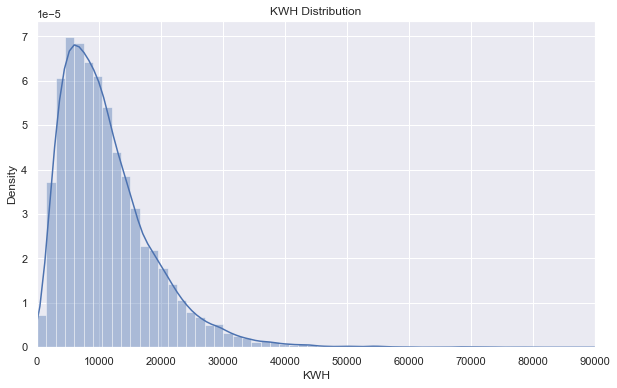

In [159]:
fig, ax = plt.subplots(figsize=[10,6])
ax.set_xlim(0,90000)
sns.distplot(df['KWH'],ax=ax, bins=100).set(title = 'KWH Distribution')

It can be seen from the graph above that the distribution of target variable is positively skewed. This means that the outliers of the distribution are further towards the right. Let's create box plot (i.e. box and whisker diagram) for our target variable to see the range of values in a more intutive way

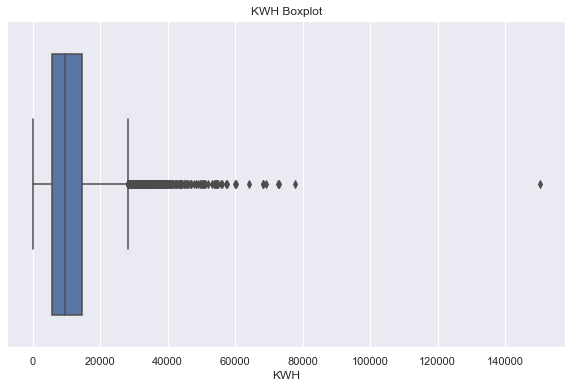

In [160]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.boxplot(x=df['KWH']).set(title = 'KWH Boxplot')

As previously observed from the distribution graph of target variable, we can now clearly see in the box plot above that there are a few potential outlier values (above upper whisker line) in our target variable _'KWH'_. We will take care of the outlier values in the data pre-processing section

To extract important predictors of our target variable 'KWH', we will find correlation between target variable 'KWH' and all predictor variables and filter the predictor variables by keeping the threshold correlation value of abs(0.4), meaning the predictor variables with a correlation of abs(0.4) with target variable 'KWH' will be shown.

In [230]:
corr = df.corr()
corr_target = abs(corr['KWH'])
relevant_features = corr_target[corr_target>0.4]
relevant_features.sort_values(ascending = False)
print("{} features were found to have correlation value of 0.4 or more with our target variable 'KWH'".format(len(relevant_features)))
print('----------------------------------------------------------------------------------------')
print('These features are: \n{}'.format(list(corr_target.index[corr_target>0.2])))

32 features were found to have correlation value of 0.4 or more with our target variable 'KWH'
----------------------------------------------------------------------------------------
These features are: 
['TYPEHUQ', 'CDD65', 'CDD30YR', 'AIA_Zone', 'KOWNRENT', 'YEARMADE', 'YEARMADERANGE', 'NUMFLRS', 'ROOFTYPE', 'STUDIO', 'NAPTFLRS', 'STORIES', 'BEDROOMS', 'NCOMBATH', 'OTHROOMS', 'TOTROOMS', 'CRAWL', 'CONCRETE', 'ATTIC', 'PRKGPLC1', 'SIZEOFGARAGE', 'GARGLOC', 'GARGHEAT', 'GARGCOOL', 'OVEN', 'OVENFUEL', 'OVENCLN', 'TYPECLN', 'OUTGRILL', 'FUELFOOD', 'NUMFRIG', 'SIZRFRI1', 'ICE', 'TYPERFR2', 'SIZRFRI2', 'REFRIGT2', 'MONRFRI2', 'SEPFREEZ', 'NUMFREEZ', 'UPRTFRZR', 'SIZFREEZ', 'FREEZER', 'DISHWASH', 'DWASHUSE', 'CWASHER', 'TOPFRONT', 'WASHLOAD', 'WASHTEMP', 'RNSETEMP', 'DRYER', 'DRYRFUEL', 'DRYRUSE', 'TVCOLOR', 'TVSIZE2', 'TVTYPE2', 'CABLESAT2', 'COMBODVR2', 'DIGITSTB2', 'PLAYSTA2', 'COMBOVCRDVD2', 'VCR2', 'DVD2', 'TVAUDIOSYS2', 'OTHERSTB2', 'TVONWD2', 'TVONWE2', 'TVSIZE3', 'TVTYPE3', 'CABLES

Let's now check which are the top 20 predictors for tagret variable 'KWH' on the basis of the results of correlation analysis

In [231]:
relevant_features.sort_values(ascending = False)[:21]

KWH            1.000000
BTUEL          1.000000
BTUELOTH       0.880403
KWHOTH         0.880403
DOLLAREL       0.868712
DOLELOTH       0.702251
TOTALBTUOTH    0.676108
TOTALDOLOTH    0.655742
BTUELCOL       0.655104
KWHCOL         0.655104
TOTALBTUCOL    0.655103
TOTALBTURFG    0.638621
KWHRFG         0.638621
BTUELRFG       0.638621
TOTALDOL       0.627922
TOTALDOLCOL    0.601628
DOLELCOL       0.601626
KWHWTH         0.585656
BTUELWTH       0.585656
DOLELWTH       0.514613
KWHSPH         0.497684
Name: KWH, dtype: float64

Let's plot the 'KWH' correlation matrix

<AxesSubplot:>

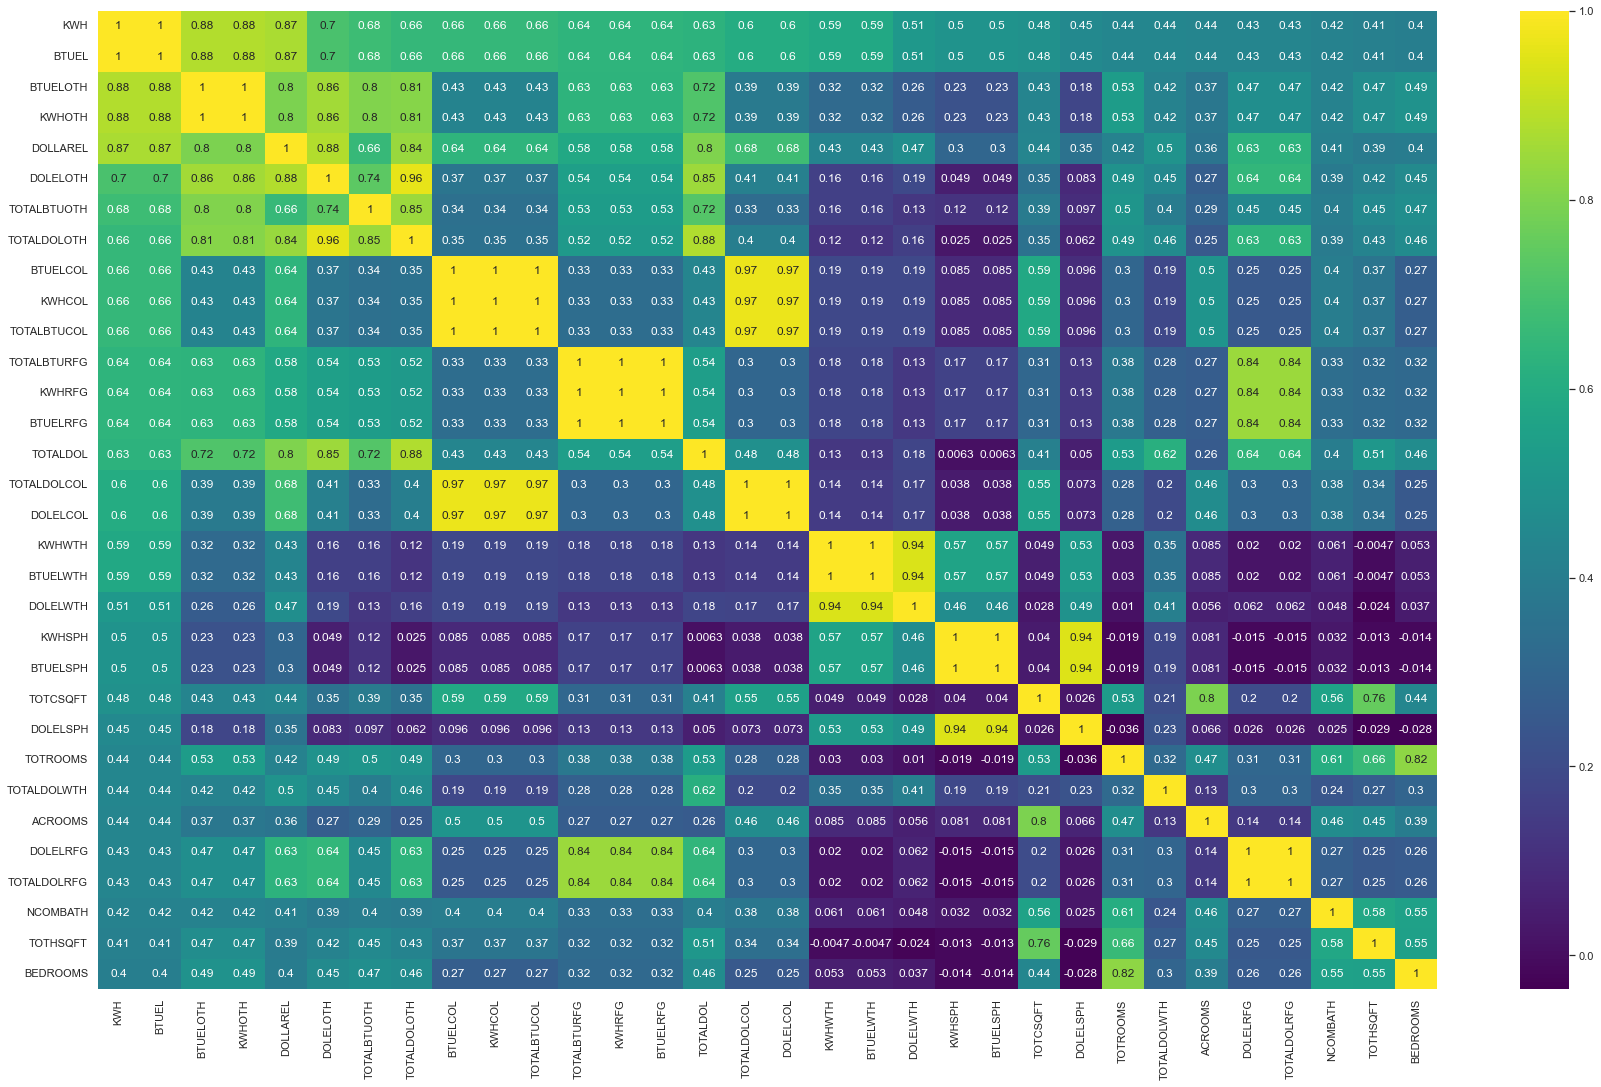

In [234]:
k = 32
cols = df.corr().nlargest(k, 'KWH')['KWH'].index
cm = df[cols].corr()
plt.figure(figsize=(30,18))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Following may be observed from the above graph:
- green and yellow color represents strong positive correlation whereas blue and purple color represents very weak positive or negative correlation
- KWH has strong positive correlation (> 0.4) with all top 31 important predictors
- Many predictor variables have high correlation with each other (such as BTUELCOL, KWHCOL, TOTALBTUCOL), thus indicating the presence of multicollinearity among predictor variables/features. We will explore collinearity among predictor features in detail in the feature selection section

Let's now explore how does these predictor variables affect the target variable 'KWH' by graphing a scatter plot between target variable and a few predictor variables

#### How does 'BTUEL' i.e. Electricity Usage in BTU affects the target variable 'KWH' i.e. Electricity Usage in KWH

Text(0, 0.5, 'Electricity Usage in KWH')

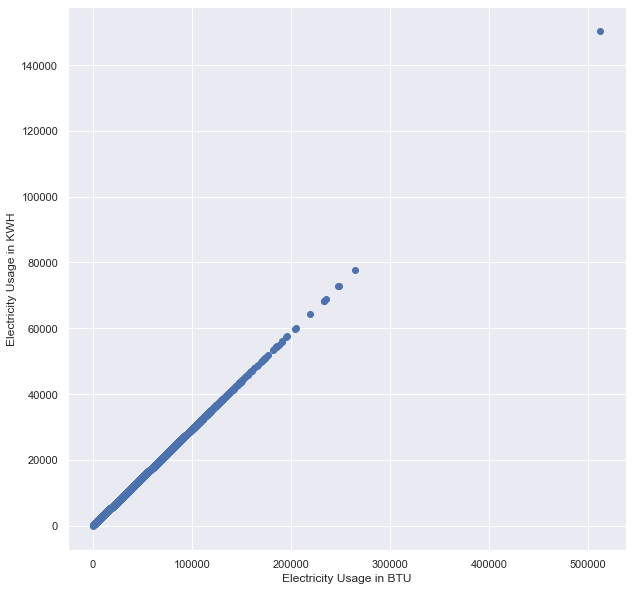

In [235]:
plt.figure(figsize=(10,10))
plt.scatter(x='BTUEL',y='KWH',data=df)
plt.xlabel('Electricity Usage in BTU')
plt.ylabel('Electricity Usage in KWH')

We can see from the scatterplot that KWH and BTUEL is perfectly correlated. Infact, it is a duplicate variable indicating total electricity usage in different units, thousand BTU in variable BTUEL and kilowatt-hours in variable 'KWH'. There are few features in the RECS dataset which are actually either duplicates or calculated by summing up the one or more predictor features. These are as follows:

- KWH = KWHSPH + KWHCOL + KWHWTH + KWHRFG + KWHOTH<br>
- BTUEL = BTUELSPH + BTUELCOL + BTUELWTH + BTUELRFG + BTUELOTH<br>
- DOLLAREL = DOLELSPH + DOLELCOL + DOLELWTH + DOLELRFG + DOLELOTH<br>
- CUFEETNG = CUFEETNGSPH + CUFEETNGWTH + CUFEETNGOTH<br>
- BTUNG = BTUNGSPH + BTUNGWTH + BTUNGOTH<br>
- DOLLARNG = DOLNGSPH + DOLNGWTH + DOLNGOTH<br>
- GALLONLP = GALLONLPSPH + GALLONLPWTH + GALLONLPOTH<br>
- BTULP = BTULPSPH + BTULPWTH + BTULPOTH<br>
- DOLLARLP = DOLLPSPH	+ DOLLPWTH + DOLLPOTH<br>
- GALLONFO = GALLONFOSPH + GALLONFOWTH + GALLONFOOTH<br>
- BTUFO = BTUFOSPH + BTUFOWTH + BTUFOOTH<br>
- DOLLARFO = DOLFOSPH + DOLFOWTH + DOLFOOTH<br>
- GALLONKER = GALLONKERSPH + GALLONKERWTH + GALLONKEROTH<br>
- BTUKER = BTUKERSPH + BTUKERWTH + BTUKEROTH<br>
- DOLLARKER = DOLKERSPH + DOLKERWTH + DOLKEROTH<br>
- TOTALBTU = TOTALBTUSPH + TOTALBTUCOL + TOTALBTUWTH + TOTALBTURFG + TOTALBTUOTH<br>
- TOTALDOL = TOTALDOLSPH + TOTALDOLCOL + TOTALDOLWTH + TOTALDOLRFG + TOTALDOLOTH<br>
- TOTALBTUSPH = BTUELSPH + BTUNGSPH + BTULPSPH + BTUFOSPH + BTUKERSPH<br>
- TOTALBTUCOL = BTUELCOL<br>
- TOTALBTUWTH = BTUELWTH + BTUNGWTH + BTULPWTH +  + BTUFOWTH + BTUKERWTH<br>
- TOTALBTURFG = BTUELRFG<br>
- TOTALBTUOTH = BTUELOTH + BTUNGOTH + BTULPOTH + BTUFOOTH + BTUKEROTH<br>
- TOTALDOLSPH = DOLELSPH + DOLNGSPH + DOLLPSPH + DOLFOSPH + DOLKERSPH<br>
- TOTALDOLCOL = DOLELCOL<br>
- TOTALDOLWTH = DOLELWTH + DOLNGWTH + DOLLPWTH + DOLFOWTH + DOLKERWTH<br>
- TOTALDOLRFG = DOLELRFG<br>
- TOTALDOLOTH = DOLELOTH + DOLNGOTH + DOLLPOTH + DOLFOOTH + DOLKEROTH<br>


#### Now, let's check how does 'TOTCSQFT' i.e. Total Cooled Square Footage, 'TOTHSQFT' Total heated square footage and 'TOTROOMS' - Total Number of Rooms in Housing affects the target variable 'KWH' i.e. Electricity Usage in KWH

Text(0, 0.5, 'Electricity Usage in KWH')

<Figure size 720x216 with 0 Axes>

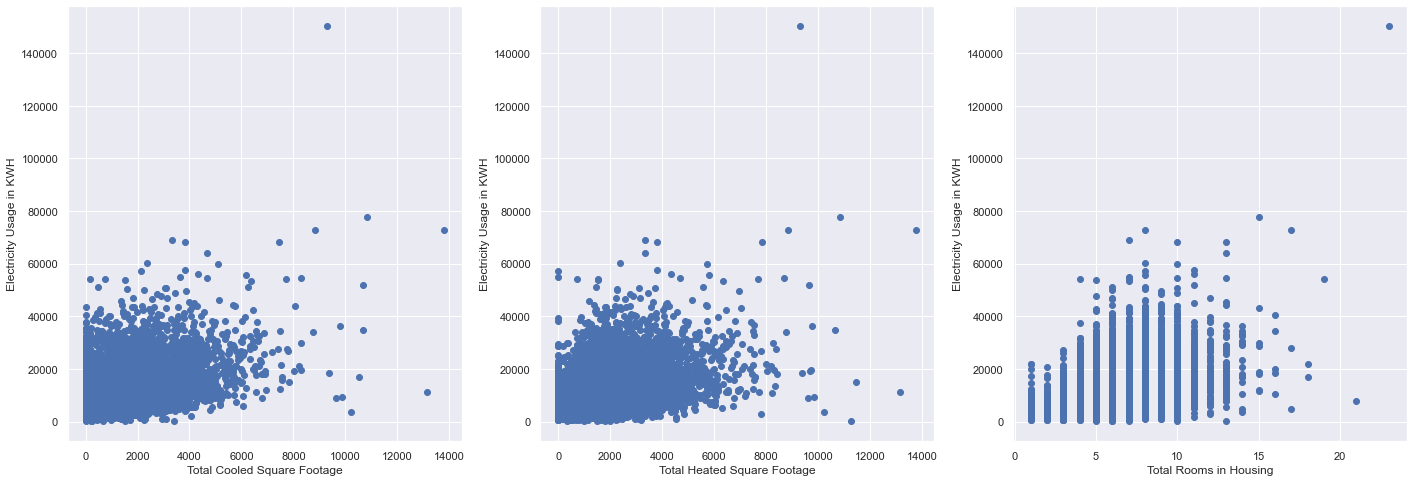

In [264]:
f = plt.figure(figsize = (10,3))
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
axs[0].scatter(x='TOTCSQFT',y='KWH',data=df)
axs[1].scatter(x='TOTHSQFT',y='KWH',data=df)
axs[2].scatter(x='TOTROOMS',y='KWH',data=df)
axs[0].set_xlabel('Total Cooled Square Footage')
axs[0].set_ylabel('Electricity Usage in KWH')
axs[1].set_xlabel('Total Heated Square Footage')
axs[1].set_ylabel('Electricity Usage in KWH')
axs[2].set_xlabel('Total Rooms in Housing')
axs[2].set_ylabel('Electricity Usage in KWH')

We can see that energy consumption increases with an increase in total number of rooms, total cooled and heated square footage in housing

<a id="46"></a>
#### f. Detect Outliers and Anomalies

Previously, in the summary statistics section, we found that the mean value was different from the median value for the features HDD65, CDD65, HDD30YR, CDD30YR, TOTSQFT, KWH, CDD80, OA_LAT. In addition, we found a large difference in the 75th percentile and maximum value for these features. These observations indicates the presence of potential outlier values in these features. Let's check each of these feature for outliers using box plot (i.e. box and whisker diagram)

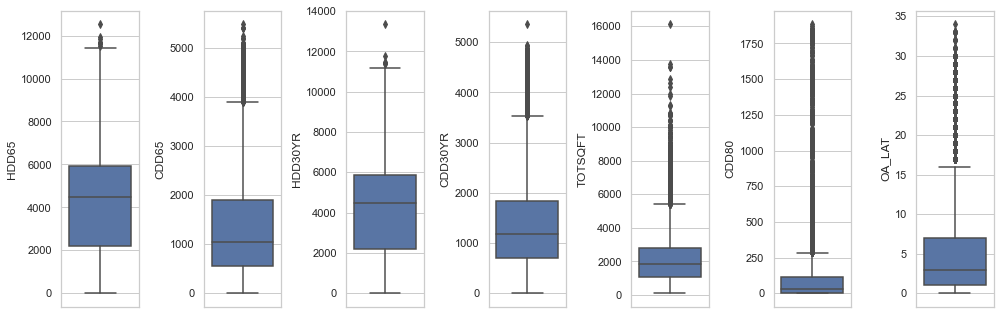

In [288]:
outl_cols = ['HDD65', 'CDD65', 'HDD30YR', 'CDD30YR', 'TOTSQFT', 'CDD80', 'OA_LAT']
number_of_columns=len(outl_cols)
number_of_rows = len(outl_cols)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(outl_cols)):
    plt.subplot(round(number_of_rows + 1),number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y = df[outl_cols[i]],orient='h')
    plt.tight_layout()

We can see from the box plot above that almost all the features shows outliers present in the dataset. Let's now check the linearity of the variables by plotting distribution graph and look for skewness of features using Kernel density estimate (kde)

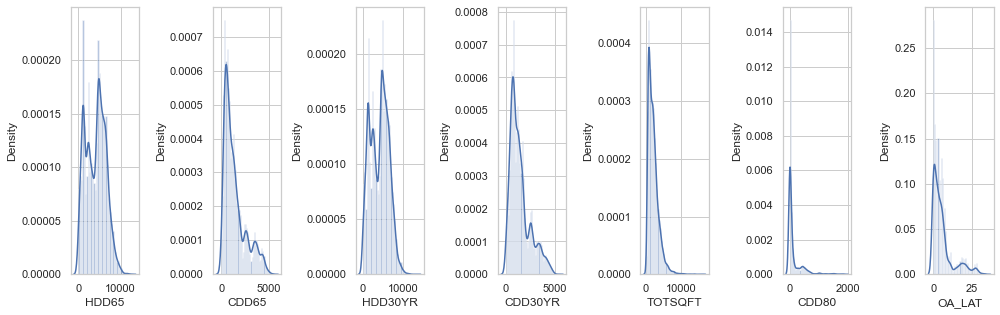

In [291]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(outl_cols)):
    plt.subplot(round(number_of_rows + 1),number_of_columns,i+1)
    sns.distplot(df[outl_cols[i]],kde=True) 
    plt.tight_layout()

All the predictor variables depcited in kde graph above are right skewed/positively skewed. Hence, we will use data standardization technique called `StandardScaler` in the later section to tackle the anomalies/ouliers present in the features

In [197]:
df[df['KWH'] > 30000]['DOEID'].count()

297

Before we begin Exploratory Data Analysis, there are a few data transformation steps that were identified by looking into the codebook. These data cleaning/transformation steps are outlined below:

### Data Transformation

- Calculated Fields: The columns generated after applying arithmetic functions on existing set of columns
- Elimination of columns not needed such as columns representing imputation flags

Below are the set of assumptions considered for the data pre-processing work:
1. All columns starting with "Z" are dropped as these columns represent imputation flags
2. It was observed that some of the dataset features are the calculated fields dervied from sum of one or more dataset columns. Some of these dataset features/columns have been mentioned below:

    KWH = KWHSPH + KWHCOL + KWHWTH + KWHRFG + KWHOTH
    
    BTUEL = BTUELSPH + BTUELCOL + BTUELWTH + BTUELRFG + BTUELOTH
    
    DOLLAREL = DOLELSPH + DOLELCOL + DOLELWTH + DOLELRFG + DOLELOTH
    
    CUFEETNG = CUFEETNGSPH + CUFEETNGWTH	CUFEETNGOTH
    
    **where keyword,**
    
     **SPH** suffixed with feature name (such as SPH suffixed with feature name KWH denotes Electricity usage for space heating, in kilowatt-hours, indicated by feature column name KWHSPH) refes to Space Heating
     
     **COL:** Air-conditioning, central and window/wall (room)
     
     **WTH:** Water Heating
     
     **RFG:** Refrigerators
     
     **OTH:** Other purposes (all end-uses except SPH, COL, WTH, and RFG)

    TOTALBTU = TOTALBTUSPH + TOTALBTUWTH + TOTALBTUOTH
    TOTALBTUSPH = BTULPSPH + BTUNGSPH + BTUFOSPH + BTUELSPH
    TOTALBTUWTH = BTULPWTH + BTUNGWTH + BTUFOWTH + BTUELWTH
    TOTALBTUOTH = BTULPAPL + BTUNGOTH + BTUFOAPL + BTUELOTH + BTUELFRG +BTUELCOL
    TOTALDOLLAR = TOTALBTUSPH + TOTALBTUWTH + TOTALBTUOTH
    TOTALDOLSPH = DOLLPSPH+ DOLNGSPH + DOLFOSPH + DOLELSPH
    TOTALDOLWTH = DOLLPWTH+ DOLNGWTH+ DOLFOWTH+ DOLELWTH
    TOTALDOLOTH = DOLLPOTH + DOLNGOTH+ DOLFOOTH + DOLELOTH + DOLELFRG + DOLELCOL
Club all electronics into 3 categories TVREL, PCOFFEQUIP, PHONE
All comsumption will be BTU and KWH will not be used
Add a column COUNTRY with value United States
Calucaled Fields
"2001 - TOTROOMS - sum(BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS)"
TOTALBTU = TOTALBTUSPH + TOTALBTUWTH + TOTALBTUOTH
TOTALBTUSPH = BTULPSPH + BTUNGSPH + BTUFOSPH + BTUELSPH
TOTALBTUWTH = BTULPWTH + BTUNGWTH + BTUFOWTH + BTUELWTH
TOTALBTUOTH = BTULPAPL + BTUNGOTH + BTUFOAPL + BTUELOTH + BTUELFRG +BTUELCOL
TOTALDOLLAR = TOTALBTUSPH + TOTALBTUWTH + TOTALBTUOTH
TOTALDOLSPH = DOLLPSPH+ DOLNGSPH + DOLFOSPH + DOLELSPH
TOTALDOLWTH = DOLLPWTH+ DOLNGWTH+ DOLFOWTH+ DOLELWTH
TOTALDOLOTH = DOLLPOTH + DOLNGOTH+ DOLFOOTH + DOLELOTH + DOLELFRG + DOLELCOL